### Lab 4


### Linear Classifier


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from linear_classifier import LinearClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set style for better visualizations
# plt.style.use('seaborn')
# sns.set_palette("husl")

Importing Dataset

In [40]:
# Load the mushroom dataset
data = pd.read_csv('data/2. Mushroom_dataset', header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [41]:
# The first column is the target (EDIBLE or POISONOUS)
# Convert target to binary (1 for EDIBLE, -1 for POISONOUS for margin loss)
le = LabelEncoder()
y = le.fit_transform(data[0])
y = 2 * y - 1  # Convert to {-1, 1}

# Convert categorical features to one-hot encoding
X = pd.get_dummies(data.drop(0, axis=1))
print(f"Dataset shape after one-hot encoding: {X.shape}")

Dataset shape after one-hot encoding: (8416, 117)


In [42]:
# Convert to numpy arrays
X = X.values
y = y.astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training

In [44]:
# Define training configurations
base_params = {
    'n_iter': 5000,
    'track_margins': True
}

configs = [
    {
        'name': 'Classic with L2',
        'params': {
            **base_params,
            'lr': 0.005,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': False,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Nesterov',
        'params': {
            **base_params,
            'lr': 0.005,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': False,
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Classic with L2 + Nesterov + Optimal LR',
        'params': {
            **base_params,
            'lr': 0.01,
            'lambda_': 0.95,
            'reg': 0.001,
            'momentum': True,
            'gamma': 0.9,
            'optimize_lr': True,
            'use_margins': False
        },
        'init_method': 'random'
    }
]

# Advanced scenarios using the best base configuration
advanced_configs = [
    {
        'name': 'Correlation Init',
        'params': configs[1]['params'].copy(),  # Using Nesterov configuration
        'init_method': 'correlation'
    },
    {
        'name': 'Random Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': False
        },
        'init_method': 'random'
    },
    {
        'name': 'Margin-based Sampling',
        'params': {
            **configs[1]['params'],
            'use_margins': True
        },
        'init_method': 'random'
    }
]

results = {}


Training base configurations...

Training Classic with L2:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': False, 'optimize_lr': False, 'use_margins': False}


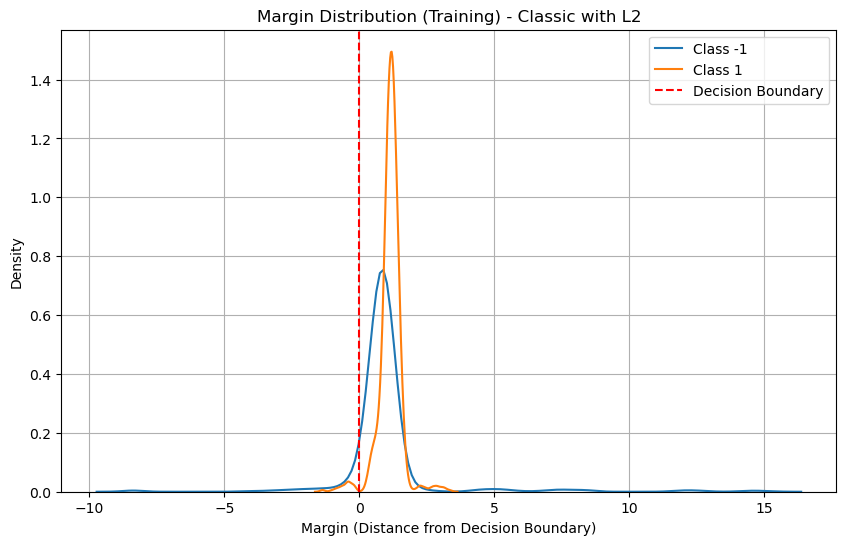


Margin Statistics:
Mean margin: 1.0714
Std margin: 1.3541
Min margin: -8.6696
Max margin: 15.3024
Median margin: 1.0237
Correctly classified rate: 0.9586


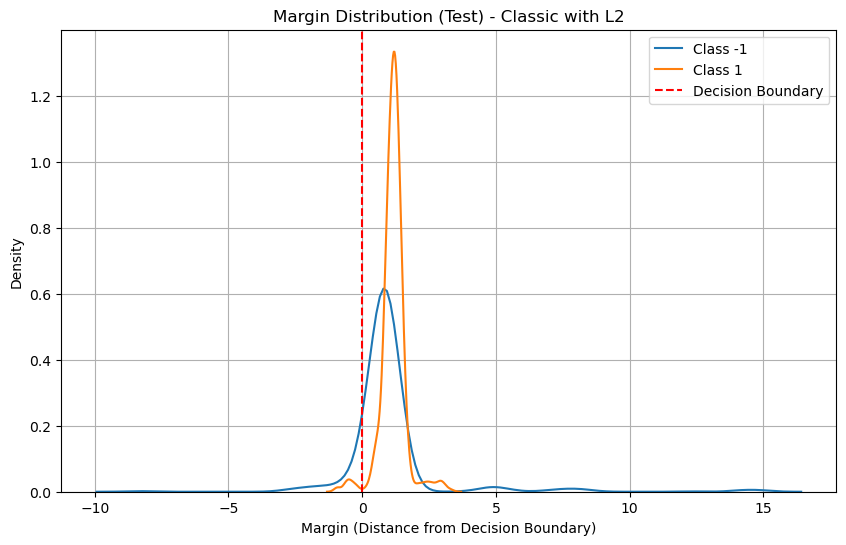


Margin Statistics:
Mean margin: 1.0872
Std margin: 1.4040
Min margin: -8.4947
Max margin: 14.9765
Median margin: 1.0029
Correctly classified rate: 0.9489

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9489

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9789     0.9247     0.9510        903
         1     0.9182     0.9770     0.9467        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

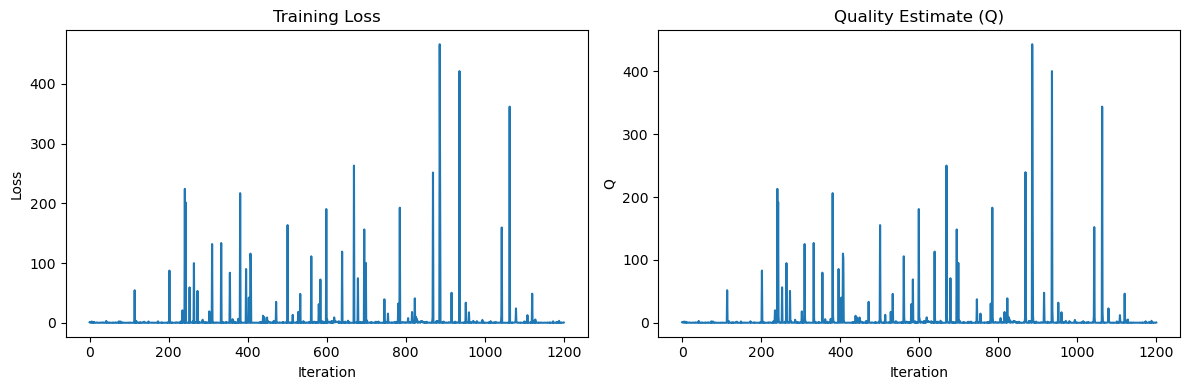

<Figure size 640x480 with 0 Axes>


Training Classic with L2 + Nesterov:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}


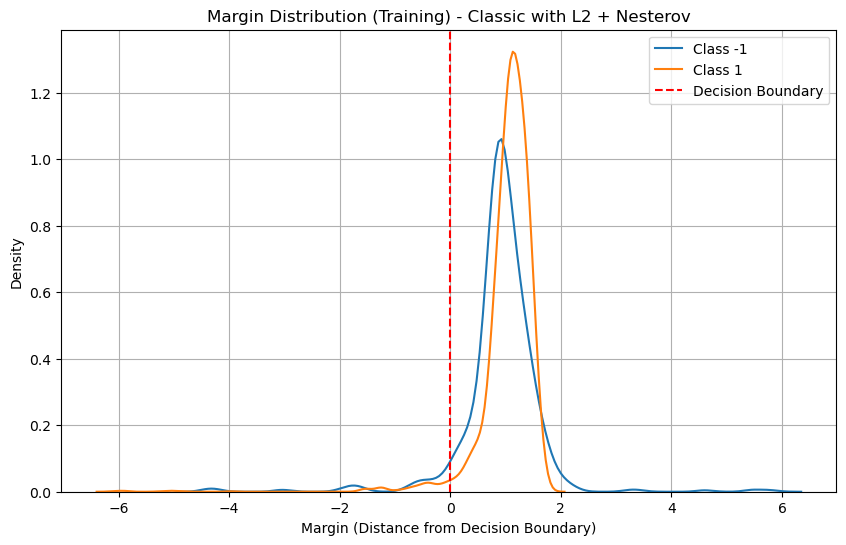


Margin Statistics:
Mean margin: 0.9776
Std margin: 0.6429
Min margin: -6.0901
Max margin: 5.9201
Median margin: 1.0344
Correctly classified rate: 0.9623


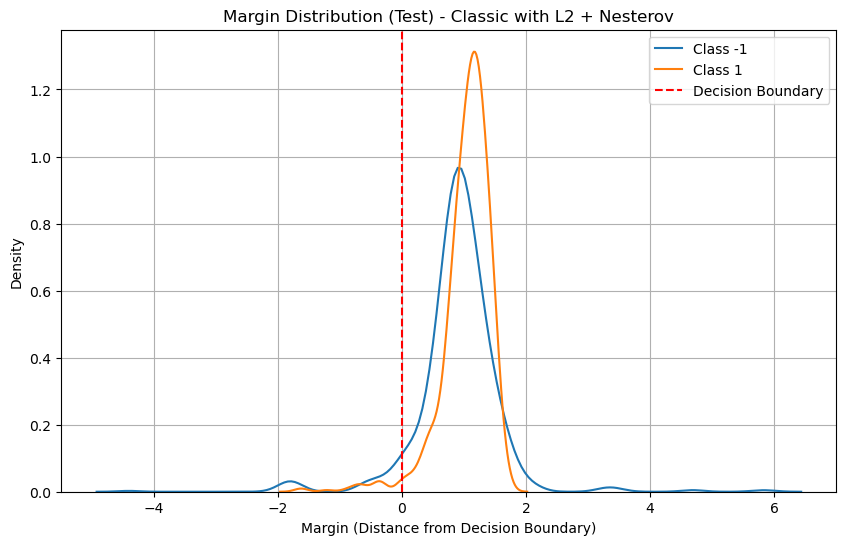


Margin Statistics:
Mean margin: 0.9697
Std margin: 0.5716
Min margin: -4.4017
Max margin: 5.9157
Median margin: 1.0164
Correctly classified rate: 0.9602

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9602

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9783     0.9468     0.9623        903
         1     0.9407     0.9757     0.9579        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

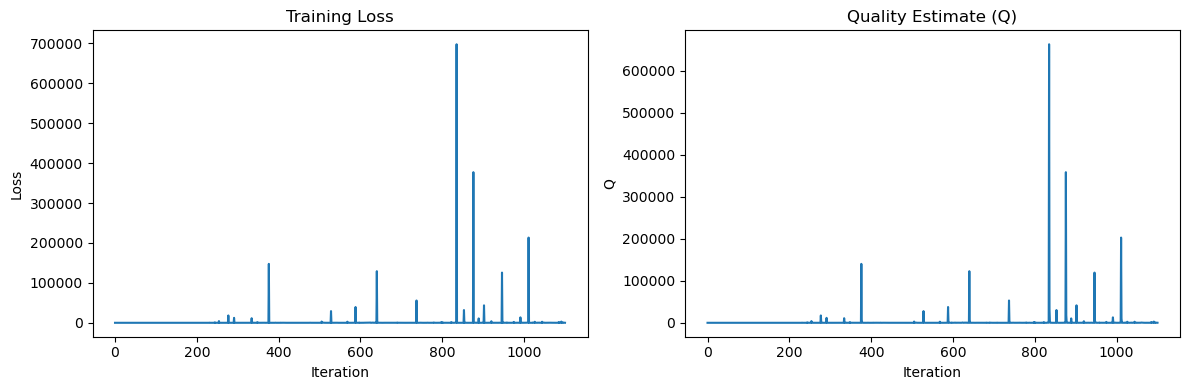

<Figure size 640x480 with 0 Axes>


Training Classic with L2 + Nesterov + Optimal LR:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.01, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': True, 'use_margins': False}


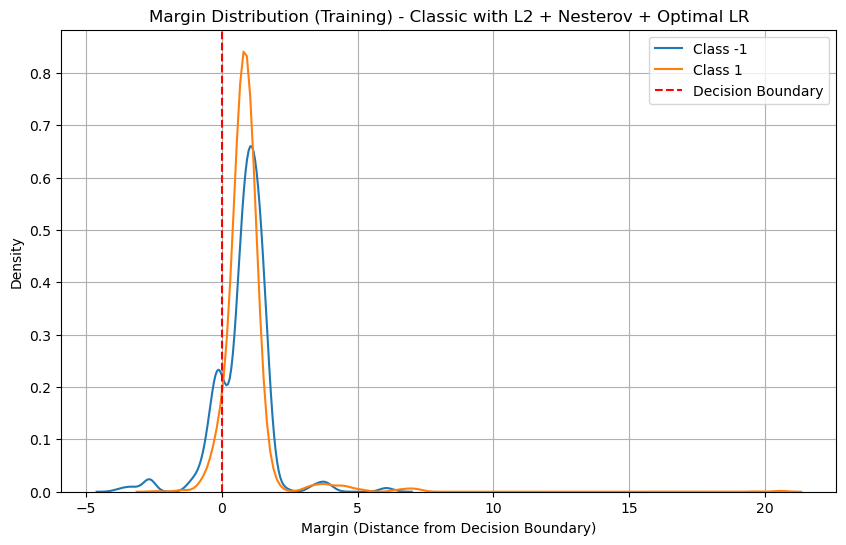


Margin Statistics:
Mean margin: 0.8543
Std margin: 1.0411
Min margin: -4.0341
Max margin: 20.6863
Median margin: 0.8758
Correctly classified rate: 0.8785


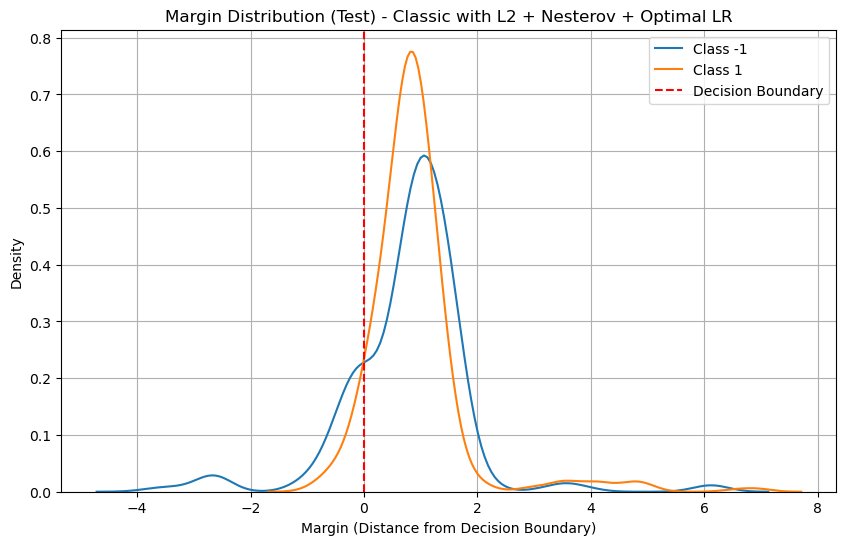


Margin Statistics:
Mean margin: 0.8421
Std margin: 1.0091
Min margin: -3.8765
Max margin: 6.9870
Median margin: 0.8685
Correctly classified rate: 0.8664

Performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.8664

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9291     0.8128     0.8671        903
         1     0.8110     0.9283     0.8657        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

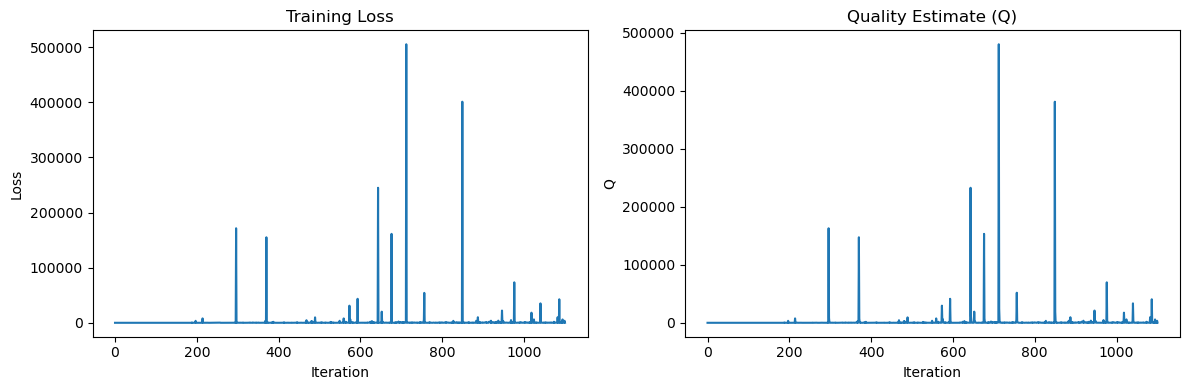

<Figure size 640x480 with 0 Axes>


Training advanced scenarios...

Training Correlation Init:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}


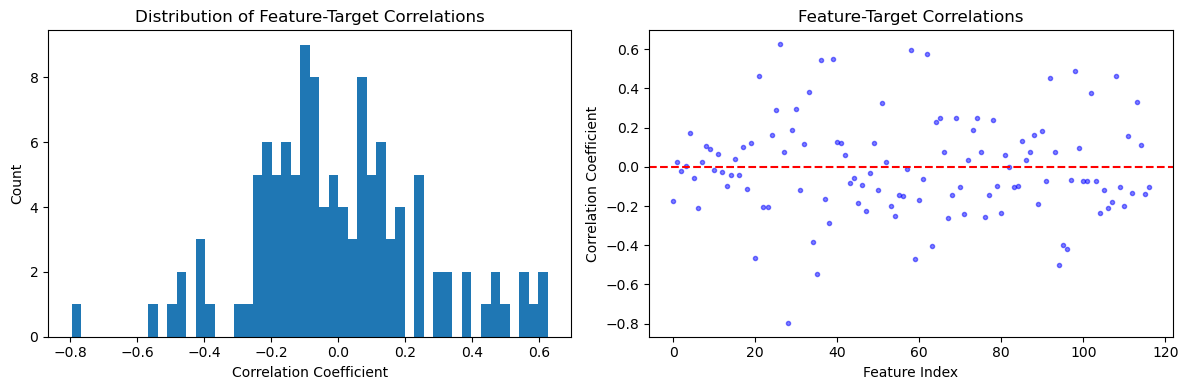


Correlation Statistics:
Mean absolute correlation: 0.1949
Max absolute correlation: 0.7957
Number of features with |correlation| > 0.1: 79


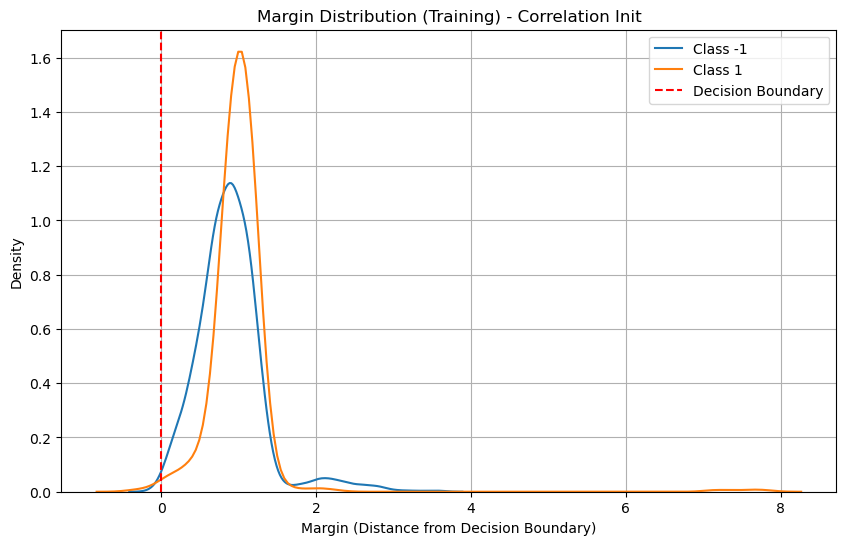


Margin Statistics:
Mean margin: 0.9475
Std margin: 0.5186
Min margin: -0.4852
Max margin: 7.9152
Median margin: 0.9391
Correctly classified rate: 0.9949


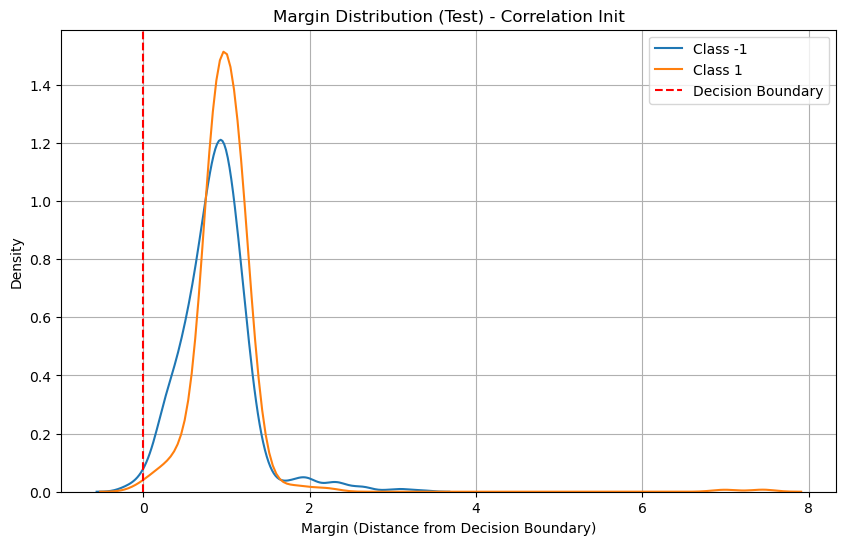


Margin Statistics:
Mean margin: 0.9337
Std margin: 0.4761
Min margin: -0.2348
Max margin: 7.4956
Median margin: 0.9277
Correctly classified rate: 0.9929

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9929

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9967     0.9900     0.9933        903
         1     0.9886     0.9962     0.9923        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

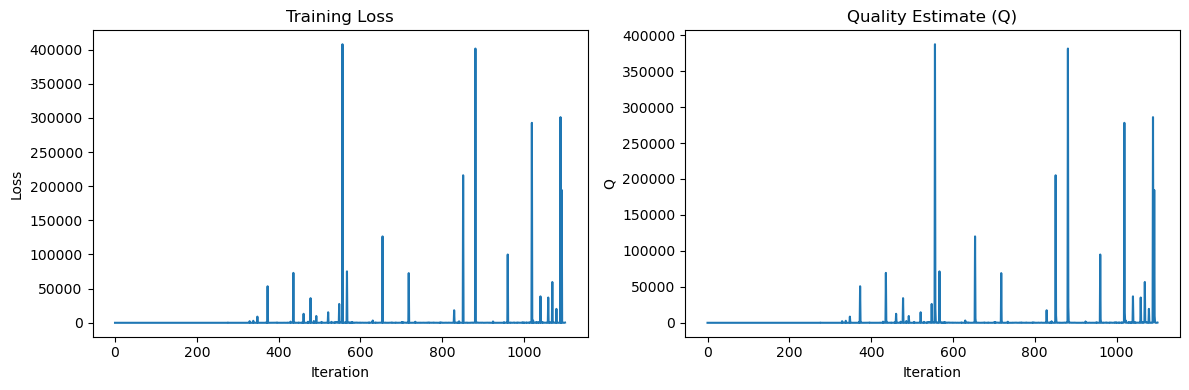

<Figure size 640x480 with 0 Axes>


Training Random Sampling:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': False}
Performing 5 runs...
Run 1 test accuracy: 0.9578
Run 2 test accuracy: 0.9115
Run 3 test accuracy: 0.9513
Run 4 test accuracy: 0.9733
Run 5 test accuracy: 0.9804

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 0.9804

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     0.9812     0.9823     0.9817        903
         1     0.9795     0.9782     0.9789        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

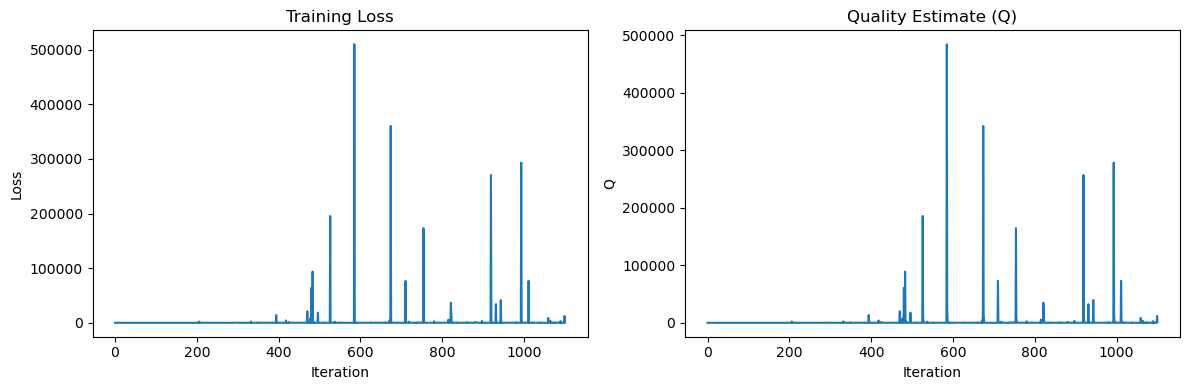

<Figure size 640x480 with 0 Axes>


Training Margin-based Sampling:
Parameters: {'n_iter': 5000, 'track_margins': True, 'lr': 0.005, 'lambda_': 0.95, 'reg': 0.001, 'momentum': True, 'gamma': 0.9, 'optimize_lr': False, 'use_margins': True}
Performing 5 runs...
Run 1 test accuracy: 0.9994
Run 2 test accuracy: 1.0000
Run 3 test accuracy: 1.0000
Run 4 test accuracy: 0.9952
Run 5 test accuracy: 0.9952

Best performance metrics:

Classification Report:
------------------------------------------------------------
Overall Accuracy: 1.0000

Per-class metrics:
------------------------------------------------------------
     Class  Precision     Recall         F1    Support
------------------------------------------------------------
        -1     1.0000     1.0000     1.0000        903
         1     1.0000     1.0000     1.0000        781
------------------------------------------------------------


<Figure size 1200x400 with 0 Axes>

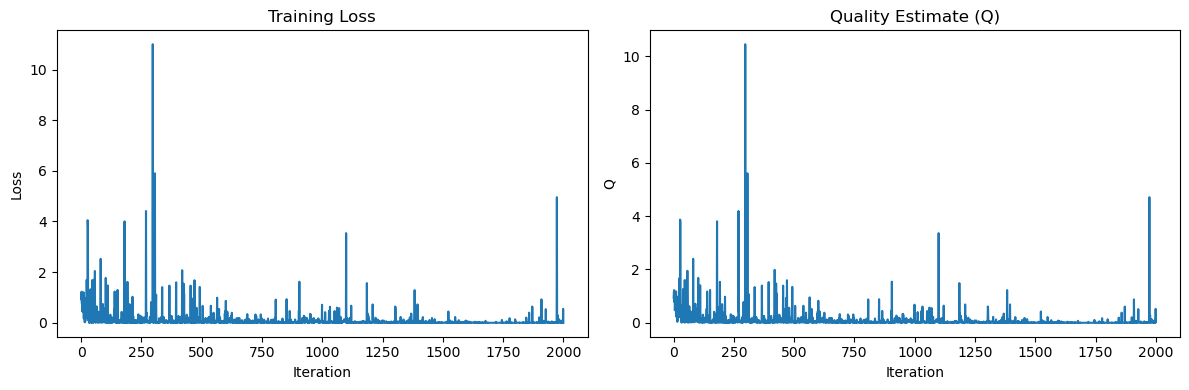

<Figure size 640x480 with 0 Axes>


Training reference implementation (SGDClassifier)...

Reference implementation performance:
------------------------------------------------------------
Training accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       903
         1.0       1.00      1.00      1.00       781

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



<Figure size 640x480 with 0 Axes>


Final Comparison:

Classic with L2:
------------------------------------------------------------
Training Accuracy: 0.9586
Test Accuracy: 0.9489

Classic with L2 + Nesterov:
------------------------------------------------------------
Training Accuracy: 0.9623
Test Accuracy: 0.9602

Classic with L2 + Nesterov + Optimal LR:
------------------------------------------------------------
Training Accuracy: 0.8785
Test Accuracy: 0.8664

Correlation Init:
------------------------------------------------------------
Training Accuracy: 0.9949
Test Accuracy: 0.9929

Random Sampling:
------------------------------------------------------------
Training Accuracy: 0.9819
Test Accuracy: 0.9804

Margin-based Sampling:
------------------------------------------------------------
Training Accuracy: 1.0000
Test Accuracy: 1.0000

Reference (SGD):
------------------------------------------------------------
Training Accuracy: 1.0000
Test Accuracy: 1.0000


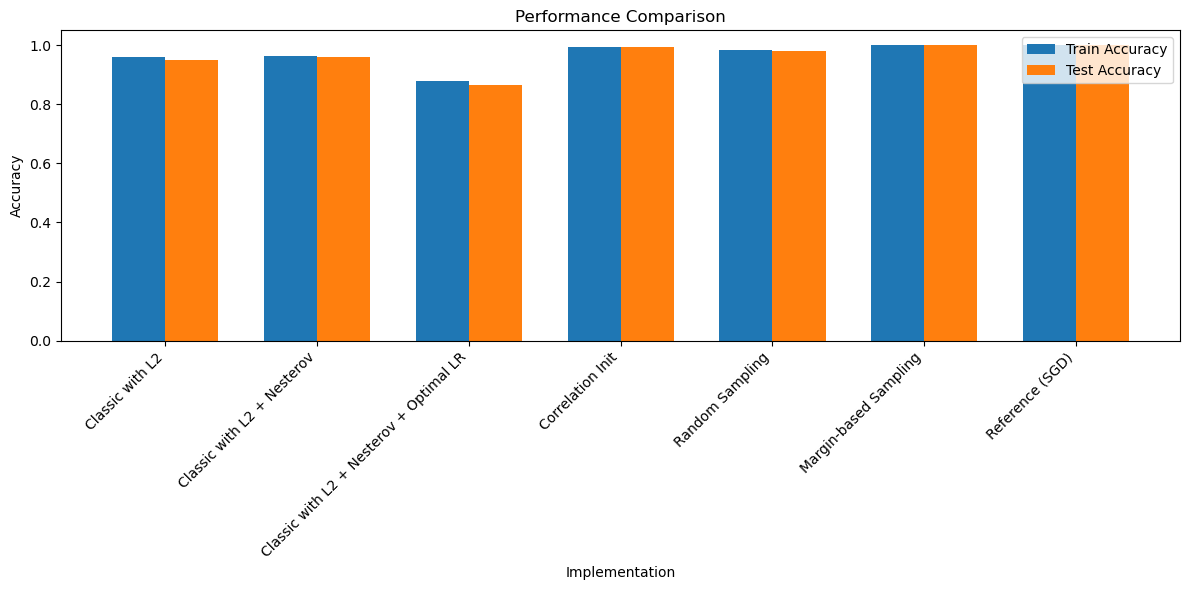

In [49]:


# Train and evaluate base configurations
print("\nTraining base configurations...")
for config in configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    clf = LinearClassifier(n_features=X_train_scaled.shape[1])
    clf.init_weights(method=config['init_method'])
    clf.fit(X_train_scaled, y_train, **config['params'])
    
    # Store results
    results[config['name']] = {
        'train_score': clf.score(X_train_scaled, y_train),
        'test_score': clf.score(X_test_scaled, y_test),
        'classifier': clf
    }

    clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
    clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}")
    
    # Print performance
    print(f"\nPerformance metrics:")
    clf.print_classification_report(X_test_scaled, y_test)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    clf.plot_training_history()
    plt.suptitle(f'Training Results: {config["name"]}')
    plt.tight_layout()
    plt.show()

# Train and evaluate advanced scenarios
print("\nTraining advanced scenarios...")
for config in advanced_configs:
    print(f"\nTraining {config['name']}:")
    print("Parameters:", config['params'])
    
    if config['name'] == 'Correlation Init':
        # Single run with correlation initialization
        clf = LinearClassifier(n_features=X_train_scaled.shape[1])
        clf.init_weights(method='correlation', X=X_train_scaled, y=y_train)
        clf.plot_feature_correlations()
        clf.fit(X_train_scaled, y_train, **config['params'])
        
        results[config['name']] = {
            'train_score': clf.score(X_train_scaled, y_train),
            'test_score': clf.score(X_test_scaled, y_test),
            'classifier': clf
        }

        clf.plot_margin_distribution(X_train_scaled, y_train, title=f"Margin Distribution (Training) - {config['name']}")
        clf.plot_margin_distribution(X_test_scaled, y_test, title=f"Margin Distribution (Test) - {config['name']}") 

    else:
        # Multiple runs for sampling strategies
        n_tries = 5
        best_score = 0
        best_clf = None
        
        print(f"Performing {n_tries} runs...")
        for i in range(n_tries):
            clf = LinearClassifier(n_features=X_train_scaled.shape[1])
            clf.init_weights(method=config['init_method'])
            clf.fit(X_train_scaled, y_train, **config['params'])
            
            test_score = clf.score(X_test_scaled, y_test)
            print(f"Run {i+1} test accuracy: {test_score:.4f}")
            
            if test_score > best_score:
                best_score = test_score
                best_clf = clf
        
        results[config['name']] = {
            'train_score': best_clf.score(X_train_scaled, y_train),
            'test_score': best_score,
            'classifier': best_clf
        }
    
    # Print performance
    print(f"\nBest performance metrics:")
    results[config['name']]['classifier'].print_classification_report(X_test_scaled, y_test)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    results[config['name']]['classifier'].plot_training_history()
    plt.suptitle(f'Training Results: {config["name"]}')
    plt.tight_layout()
    plt.show()

# Add reference implementation using SGDClassifier
print("\nTraining reference implementation (SGDClassifier)...")
ref_clf = SGDClassifier(
    loss='squared_hinge',  # Equivalent to quadratic loss
    penalty='l2',
    alpha=0.01,  # L2 regularization strength
    learning_rate='constant',
    eta0=0.01,  # Learning rate
    max_iter=5000,
    tol=1e-3,
    random_state=42
)

ref_clf.fit(X_train_scaled, y_train)

# Store reference results
results['Reference (SGD)'] = {
    'train_score': ref_clf.score(X_train_scaled, y_train),
    'test_score': ref_clf.score(X_test_scaled, y_test),
    'classifier': ref_clf
}

# Print reference performance
print("\nReference implementation performance:")
print("-" * 60)
print(f"Training accuracy: {results['Reference (SGD)']['train_score']:.4f}")
print(f"Test accuracy: {results['Reference (SGD)']['test_score']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ref_clf.predict(X_test_scaled)))



plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Comparison:")
print("=" * 80)
for name, result in results.items():
    print(f"\n{name}:")
    print("-" * 60)
    print(f"Training Accuracy: {result['train_score']:.4f}")
    print(f"Test Accuracy: {result['test_score']:.4f}")

# Plot comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results))

train_accs = [result['train_score'] for result in results.values()]
test_accs = [result['test_score'] for result in results.values()]

plt.bar(index - bar_width/2, train_accs, bar_width, label='Train Accuracy')
plt.bar(index + bar_width/2, test_accs, bar_width, label='Test Accuracy')

plt.xlabel('Implementation')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.xticks(index, list(results.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
